# Vision Models

Vision models can look at pictures and then tell you what's in them using words. These are called vision-to-text models. They bring together the power of understanding images and language. Using fancy neural networks, these models can look at pictures and describe them in a way that makes sense. They're like a bridge between what you see and what you can read. 

This is super useful for things like making captions for images, helping people who can't see well understand what's in a picture, and organizing information. As these models get even smarter, they're going to make computers even better at understanding and talking about what they "see" in pictures. It's like teaching computers to understand and describe the visual world around us.


In [88]:
import warnings
import os

import openai
from openai import OpenAI

from dotenv import load_dotenv, find_dotenv
from typing import List

Load the environment

In [89]:
_ = load_dotenv(find_dotenv()) # read local .env file
warnings.filterwarnings('ignore')
openai.api_base = os.getenv("ANYSCALE_API_BASE", os.getenv("OPENAI_API_BASE"))
openai.api_key = os.getenv("ANYSCALE_API_KEY", os.getenv("OPENAI_API_KEY"))
MODEL = os.getenv("MODEL")
print(f"Using MODEL={MODEL}; base={openai.api_base}")

Using MODEL=gpt-4-1106-preview; base=https://api.openai.com/v1


#### Change the model to use gpt-4-vision-preview!

In [90]:
MODEL = "gpt-4-vision-preview"

In [91]:
# create the OpenAI client, which can be used transparently with Anyscale Endpoints too

from openai import OpenAI

client = OpenAI(
    api_key = openai.api_key,
    base_url = openai.api_base
)

In [92]:
# Utility function to send and fetch response

def get_commpletion(clnt: object, model: str, messages: List[object]) -> str:
    chat_completion = clnt.chat.completions.create(
        model=model,
        messages= messages,
        max_tokens=1000,
        temperature = 0.8)

    response = chat_completion.choices[0].message.content
    return response

In [93]:
# Got the code off openai forums
from io import BytesIO
from PIL import Image

def encode_image(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        max_dim = max(width, height)
        if max_dim > 1024:
            scale_factor = 1024 / max_dim
            new_width = int(width * scale_factor)
            new_height = int(height * scale_factor)
            img = img.resize((new_width, new_height))
        
        buffered = BytesIO()
        img.save(buffered, format="JPEG")
        img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
        return img_str

In [94]:
encoded_string = encode_image("./images/pexels-photo-14690500.jpeg")

In [95]:
system_content = """You are an expert analyzing images and provide accurate descriptions.
You do not make descriptions."""

In [96]:
messages=[
        {
            "role": "system",
            "content": [
                {"type": "text", "text": system_content},
            ],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{encoded_string}"},
                }
            ],
        },
        {
            "role": "user",
            "content": [
                {"type": "text", 
                 "text": "Describe this picture, country, settings, and art style. Identify any signs and indicate what they may suggest."},
            ],
        },
    ]

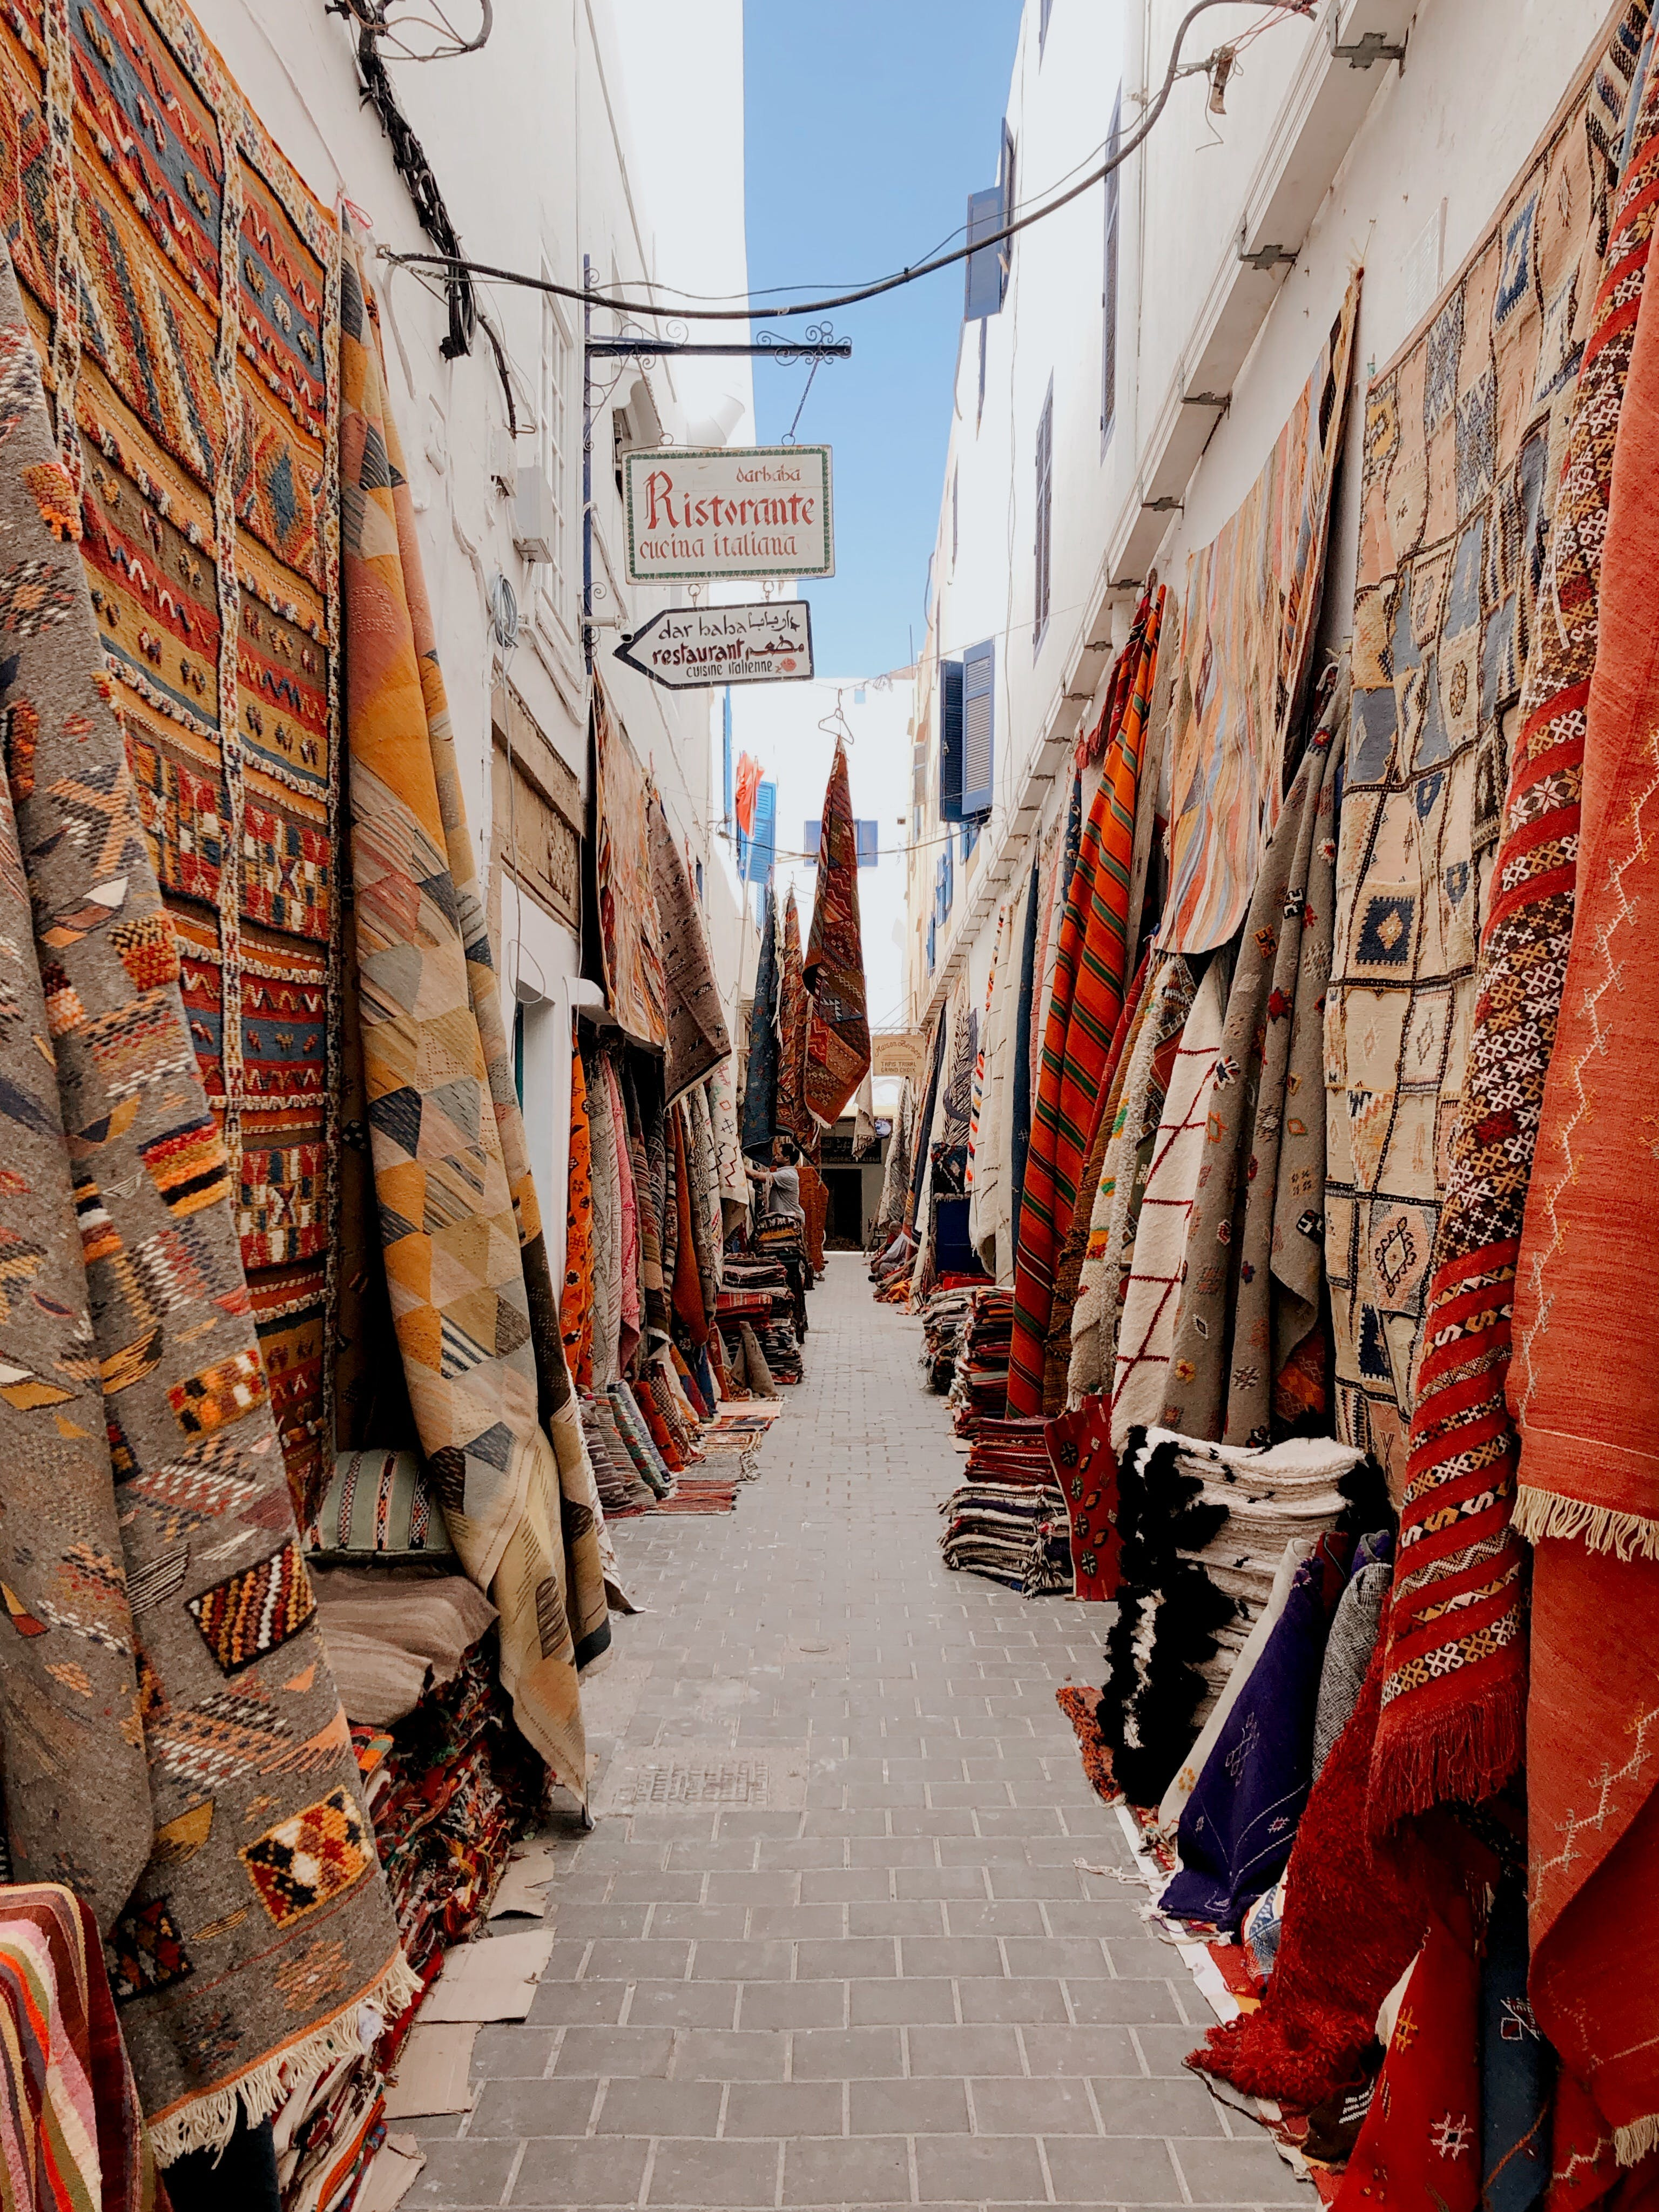

In [97]:
from IPython.display import Image, display

# Specify the path to your image file
image_path = "./images/pexels-photo-14690500.jpeg"

# Display the image in the notebook cell
display(Image(filename=image_path))


In [99]:
response = get_commpletion(client, MODEL, messages)
print(f"Image description: {response}\n")

Image description: The picture shows a narrow alleyway in what appears to be a traditional market setting, often referred to as a souk or bazaar, which is common in many North African or Middle Eastern countries. The location could be in a region such as Morocco, based on the style of the textiles and the visible signage.

The walls on either side of the alley are lined with a variety of colorful textiles, most prominently rugs, which are hung to display their intricate patterns and designs. The rugs feature an array of geometric patterns, borders, and motifs that are characteristic of traditional North African or Middle Eastern craftsmanship. The art style of the textiles suggests they are handmade, and the designs may incorporate both Berber and Arab influences, which are typical of Moroccan textiles.

There is a sign hanging above the alley that reads "Ristorante cucina italiana," which translates from Italian to "Restaurant Italian cuisine." Below it is another sign with the words 

## Modality Model is your eyes & ears! 😜  Feel the wizardy prompt power 🧙‍♀️